In [1]:
import torch
import matplotlib.pyplot as plt
from torch_geometric.data import Data
import networkx as nx

/global/homes/s/sidnb13/.conda/envs/matdeeplearn/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [16]:
x = torch.ones(5, 2) # graph with 5 nodes and 2 features
edge_index = torch.tensor([[0,0,0,0],[1,2,3,4]]) # edge list
edge_attr = torch.ones(4, 3) # 4 edges and 3 features

In [17]:
sample_graph = Data(x=x, edge_index=edge_index, edge_attr=edge_attr)

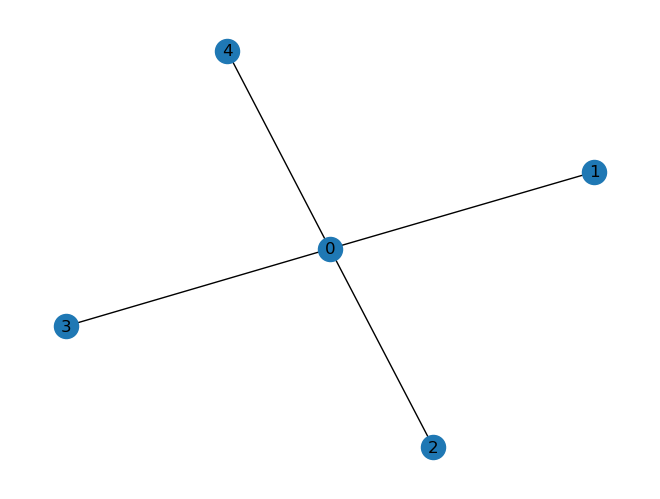

In [18]:
nx.draw(nx.from_edgelist(edge_index.t().numpy()), with_labels=True)

In [37]:
from matdeeplearn.models.alignn import (
    NodeAggregation, EdgeAggregation, NodeModel, EdgeModel, EdgeGatedGraphConv, RBFExpansion
)

In [35]:
edge_aggr = EdgeAggregation()

print(edge_aggr(x, edge_index))

tensor([[0.0000, 0.0000],
        [0.7311, 0.7311],
        [0.7311, 0.7311],
        [0.7311, 0.7311],
        [0.7311, 0.7311]])


In [36]:
edge_conv = EdgeGatedGraphConv(2, 2)
print(edge_conv(x, edge_index, edge_attr))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4x3 and 2x2)

In [ ]:
node_model = NodeModel(2, 2)
print(node_model(x, edge_index, edge_attr))

In [43]:
rbf = RBFExpansion()
print(rbf(torch.tensor([0, 1, 2, 3, 4]).float()))

Lengthscale not specified, using 0.20512820780277252
tensor([[1.0000e+00, 8.1454e-01, 4.4021e-01, 1.5784e-01, 3.7551e-02, 5.9272e-03,
         6.2073e-04, 4.3130e-05, 1.9884e-06, 6.0818e-08, 1.2342e-09, 1.6618e-11,
         1.4846e-13, 8.7995e-16, 3.4605e-18, 9.0290e-21, 1.5630e-23, 1.7953e-26,
         1.3681e-29, 6.9173e-33, 2.3205e-36, 5.1648e-40, 7.5670e-44, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [7.6351e-03, 4.5953e-02, 1.8351e-01, 4.8619e-01, 8.5466e-01, 9.9680e-01,
         7.7135e-01, 3.9602e-01, 1.3490e-01, 3.0489e-02, 4.5719e-03, 4.5486e-04,
         3.0025e-05, 1.3150e-06, 3.8211e-08, 7.3670e-10, 9.4234e-12, 7.9976e-14,
         4.5033e-16, 1.6824e-18, 4.1703e-21, 6.8585e-24, 7.4838e-27, 5.4180e-30,
         2.6025e-33, 8.2938e-37, 1.7537e-40, 2.5223e-44, 0.0000e+00, 0.0000e+00